In [1]:
import pandas as pd
import numpy as np


In [2]:
#preprocessing

In [3]:
df = pd.read_csv('test titanic.csv',sep=',')

In [4]:
df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:


# Assuming df contains columns 'sibsp' and 'parch'
df['Travelalone'] = np.where((df['SibSp'] + df['Parch']) > 0, 0, 1).astype('uint8')



In [8]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Travelalone'],
      dtype='object')

In [9]:
df1 = df.drop(['PassengerId',  'Name',  'SibSp', 'Parch',
       'Ticket', 'Cabin'],axis=1)

In [10]:
df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Travelalone      0
dtype: int64

In [11]:
df['Age'].fillna(df1['Age'].median(skipna=True), inplace=True)

C:\Users\anuzk\AppData\Local\Temp\ipykernel_10304\2169829194.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df1['Age'].median(skipna=True), inplace=True)


In [12]:
df1.head()

,Pclass,Sex,Age,Fare,Embarked,Travelalone
0,3,male,34.5,7.8292,Q,1
1,3,female,47.0,7.0000,S,0
2,2,male,62.0,9.6875,Q,1
3,3,male,27.0,8.6625,S,1
4,3,female,22.0,12.2875,S,0


In [13]:
df_titanic = pd.get_dummies(df1, columns=['Pclass', 'Embarked', 'Sex'], drop_first=True)


In [14]:
df_titanic.head()

,Age,Fare,Travelalone,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,False,True,True,False,True
1,47.0,7.0000,0,False,True,False,True,False
2,62.0,9.6875,1,True,False,True,False,True
3,27.0,8.6625,1,False,True,False,True,True
4,22.0,12.2875,0,False,True,False,True,False


In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [16]:
trans_MM = MinMaxScaler()
trans_SS = StandardScaler()


In [17]:
x=df_titanic

In [18]:
df_MM=trans_MM.fit_transform(x)
pd.DataFrame(df_MM)

,0,1,2,3,4,5,6,7
0,0.452723,0.015282,1.0,0.0,1.0,1.0,0.0,1.0
1,0.617566,0.013663,0.0,0.0,1.0,0.0,1.0,0.0
2,0.815377,0.018909,1.0,1.0,0.0,1.0,0.0,1.0
3,0.353818,0.016908,1.0,0.0,1.0,0.0,1.0,1.0
4,0.287881,0.023984,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
413,NaN,0.015713,1.0,0.0,1.0,0.0,1.0,1.0
414,0.512066,0.212559,1.0,0.0,0.0,0.0,0.0,0.0
415,0.505473,0.014151,1.0,0.0,1.0,0.0,1.0,1.0
416,NaN,0.015713,1.0,0.0,1.0,0.0,1.0,1.0


In [19]:
df_SS =trans_SS.fit_transform(x)
pd.DataFrame(df_SS)

,0,1,2,3,4,5,6,7
0,0.298549,-0.497811,0.807573,-0.534933,0.957826,2.843757,-1.350676,0.755929
1,1.181328,-0.512660,-1.238278,-0.534933,0.957826,-0.351647,0.740370,-1.322876
2,2.240662,-0.464532,0.807573,1.869391,-1.044031,2.843757,-1.350676,0.755929
3,-0.231118,-0.482888,0.807573,-0.534933,0.957826,-0.351647,0.740370,0.755929
4,-0.584229,-0.417971,-1.238278,-0.534933,0.957826,-0.351647,0.740370,-1.322876
...,...,...,...,...,...,...,...,...
413,NaN,-0.493856,0.807573,-0.534933,0.957826,-0.351647,0.740370,0.755929
414,0.616350,1.312180,0.807573,-0.534933,-1.044031,-0.351647,-1.350676,-1.322876
415,0.581038,-0.508183,0.807573,-0.534933,0.957826,-0.351647,0.740370,0.755929
416,NaN,-0.493856,0.807573,-0.534933,0.957826,-0.351647,0.740370,0.755929


In [20]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

In [21]:
X, y = make_classification(n_samples=9000, n_features=18, n_informative=4, n_redundant=12, random_state=4)

In [30]:
#splliting the data in train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [31]:
train_scores,test_scores = list(),list()

In [32]:
values= [i for i in range(1,21)]

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

train_score = []  # Define train_score list
test_score = []   # Define test_score list

for i in values:
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    train_score.append(train_acc)
    test_score.append(test_acc)
    print('>%d,train : %.3f ,test: %.3f' % (i, train_acc, test_acc))  


>1,train : 0.835 ,test: 0.838
>2,train : 0.850 ,test: 0.853
>3,train : 0.872 ,test: 0.867
>4,train : 0.899 ,test: 0.887
>5,train : 0.905 ,test: 0.891
>6,train : 0.929 ,test: 0.913
>7,train : 0.950 ,test: 0.929
>8,train : 0.957 ,test: 0.930
>9,train : 0.968 ,test: 0.933
>10,train : 0.975 ,test: 0.936
>11,train : 0.979 ,test: 0.934
>12,train : 0.985 ,test: 0.937
>13,train : 0.987 ,test: 0.938
>14,train : 0.990 ,test: 0.939
>15,train : 0.993 ,test: 0.939
>16,train : 0.995 ,test: 0.939
>17,train : 0.996 ,test: 0.938
>18,train : 0.998 ,test: 0.941
>19,train : 0.998 ,test: 0.941
>20,train : 0.999 ,test: 0.936


ValueError: x and y must have same first dimension, but have shapes (20,) and (0,)

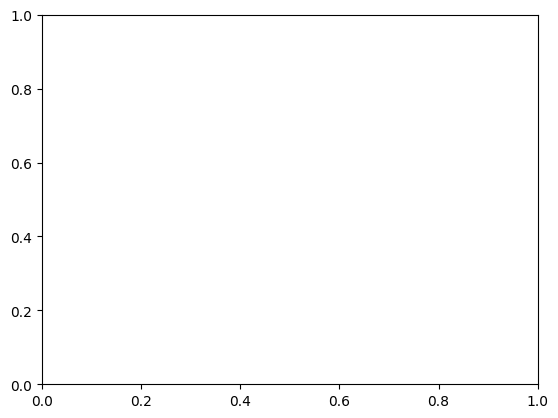

In [37]:
# Plotting training scores
pyplot.plot(values, train_scores, '-o', label='Train')

# Plotting testing scores
pyplot.plot(values, test_scores, '-o',  label='test')

# Adding legend
pyplot.legend()

# Displaying the plot
pyplot.show()

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
#crossvalidation
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [2, 4, 6, 10, 20],
    'min_samples_split': [5, 10, 20, 50, 100]
}

# Create the GridSearchCV object
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, n_jobs=-1, scoring="accuracy")

# Fit the model
clf.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 10, 20],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             scoring='accuracy')

In [40]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=20)

In [41]:
print(accuracy_score(y_train,clf.best_estimator_.predict(X_train)))
print(accuracy_score(y_test,clf.best_estimator_.predict(X_test)))
#overfitting problem is resolved

0.9766666666666667
0.9392592592592592
